In [57]:
#Import tensorflow and keras library
import tensorflow as tf
import keras_preprocessing
from tensorflow.keras.preprocessing import image
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
import keras
from tensorflow.keras.callbacks import ModelCheckpoint


In [58]:
# # Importing the images 
# from google.colab import drive
# drive.mount('/content/drive')

In [59]:
# from zipfile import ZipFile
# with ZipFile('/content/drive/MyDrive/BTP/Dataset/tomato.zip','r') as zipObj:
#   zipObj.extractall('/content/drive/MyDrive/BTP/Dataset/dataset')

In [60]:
train_datagen=ImageDataGenerator(validation_split=0.2,rescale=1./255,
                                 horizontal_flip=True,rotation_range=.2,shear_range=.2)
test_datagen=ImageDataGenerator(rescale=1./255)

In [61]:
TRAINING_DIR = r"C:\Life Projects\DAIICT_hackout\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train" 
TESTING_DIR = r"C:\Life Projects\DAIICT_hackout\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid"

In [62]:
training_set=train_datagen.flow_from_directory(TRAINING_DIR,
                                               target_size=(224,224),class_mode="categorical",batch_size=32,shuffle=True,subset="training")

validation_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=True,
        subset="validation")

test_set=test_datagen.flow_from_directory(TESTING_DIR,
                                          target_size=(224,224),batch_size=32,class_mode="categorical",shuffle=True)

Found 14678 images belonging to 10 classes.
Found 3667 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [63]:
# TARGET_SIZE = (150,150)
# # TRAIN_BATCH_SIZE = 128
# # VALID_BATCH_SIZE = 32
# SEED = 42

# #Data Iterator
# train_data = train_gen.flow_from_directory(
# TRAINING_DIR,
# target_size = TARGET_SIZE,
# class_mode = 'categorical',
# color_mode = "rgb",
# batch_size = 32,
# shuffle = True,
# seed = SEED,
# subset="training"
# )

# validation_generator = train_gen.flow_from_directory(
#         TRAINING_DIR,
#         target_size=(150, 150),
#         batch_size=32,
#         class_mode='categorical',
#         shuffle=True,
#         subset="validation")


# test_data = valid_gen.flow_from_directory(

# TESTING_DIR,
# target_size = TARGET_SIZE,
# class_mode = 'categorical',
# color_mode = "rgb",
# batch_size = 32
# )

In [69]:
from glob import glob
folder=glob(r"C:\Life Projects\DAIICT_hackout\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train")
folder

['C:\\Life Projects\\DAIICT_hackout\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train']

In [70]:
from tensorflow import keras
from keras.applications.vgg16 import VGG16
base_model = keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=[224, 224, 3])
#load weight from local file which is just added
#base_model = applications.VGG16(weights='../input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(img_rows, img_cols, img_channel))

base_model_weights_path = r'C:\Life Projects\DAIICT_hackout\vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
# base_model = VGG16(weights=base_model_weights_path, include_top=False, input_shape=(224, 224, 3))

x = keras.layers.Flatten() (base_model.output)
x = keras.layers.Dense(256, activation="relu")(x)
x = keras.layers.Dropout(0.25)(x)
output = keras.layers.Dense(units=len(folder), activation='softmax')(x)
model = keras.models.Model(inputs=base_model.input, outputs=output)

# The newly added layers are initialized with random values.
# Make sure based model remain unchanged until newly added layers weights get reasonable values.
for layer in base_model.layers:
    layer.trainable = False

In [71]:
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,137,729 (80.63 MB)

 Trainable params: 6,423,041 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [72]:
LEARNING_RATE = 0.0001
#LEARNING_RATE = 0.001

# Optimizer
opt = Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])


In [73]:
#TRAINING_NUM = train_data.n #or train_data.samples
# VALID_NUM = test_data.n
EPOCHS = 50

# STEP_SIZE_TRAIN = TRAINING_NUM // TRAIN_BATCH_SIZE 
# STEP_SIZE_VALID = VALID_NUM // VALID_BATCH_SIZE

# Fit model to get reasonable weights for newly added layers.
history = model.fit(x = training_set, validation_data=validation_generator,epochs=EPOCHS)

# history = model.fit_generator(train_data,
#                              validation_data = validation_generator,
#                              epochs = EPOCHS)

Epoch 1/50


c:\Python312\Lib\site-packages\keras\src\losses\losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 10), output.shape=(None, 1)

NameError: name 'history' is not defined

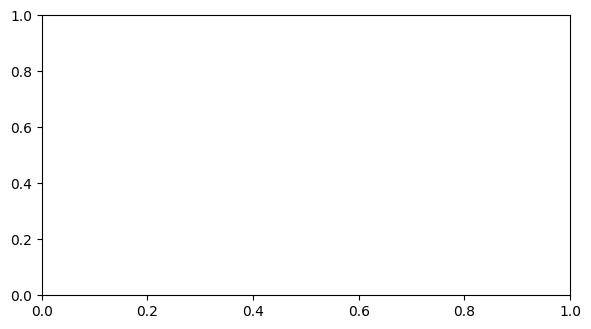

In [ ]:
import matplotlib.pyplot as plt

plt.figure( figsize = (15,8)) 
    
plt.subplot(221)  
# Accuracy 
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()


# Loss
plt.figure( figsize = (15,8)) 
plt.subplot(222)  
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

In [ ]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)

In [ ]:
# Scores is just a list containing loss and accuracy value
scores=model.evaluate(training_set)
scores2=model.evaluate(test_set)
print("Training Loss is : "+str(scores[0]))
print("Training Accuracy is : "+str(scores[1]*100)+" %")
print("Testing Loss is : "+str(scores2[0]))
print("Testing Accuracy is : "+str(scores2[1]*100)+" %")

# FINE-TUNING

In [ ]:
for layer in base_model.layers:
    layer.trainable = True

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate (This ensures the base model weights do not change a lot)
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [ ]:
EPOCHS = 50

# STEP_SIZE_TRAIN = TRAINING_NUM // TRAIN_BATCH_SIZE 
# STEP_SIZE_VALID = VALID_NUM // VALID_BATCH_SIZE

# Fit model to get reasonable weights for newly added layers.
history = model.fit(x = training_set, validation_data=validation_generator,epochs=EPOCHS)


In [ ]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)

In [ ]:
import matplotlib.pyplot as plt

plt.figure( figsize = (15,8)) 
    
plt.subplot(221)  
# Accuracy 
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()


# Loss
plt.figure( figsize = (15,8)) 
plt.subplot(222)  
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

In [ ]:
# Scores is just a list containing loss and accuracy value
scores=model.evaluate(training_set)
scores2=model.evaluate(test_set)
print("Training Loss is : "+str(scores[0]))
print("Training Accuracy is : "+str(scores[1]*100)+" %")
print("Testing Loss is : "+str(scores2[0]))
print("Testing Accuracy is : "+str(scores2[1]*100)+" %")